In [1]:
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mnist import MNIST as mnist

In [2]:
#einlesen der CSV 'leav.csv'
leafArr = pd.read_csv('leaf.csv', sep=',', header = None)
leafArr.rename(columns={0:'classname',1:'id_per_class'},inplace=True)
leafArr.head()

,classname,id_per_class,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [3]:
#erstellen von Array, das später den Attributen Frabe gibt
colorArr = ["yellow", "red", "green", "magenta", "blue", "pink", "brown", "black", "grey", "navy", "gold", "coral", "royalblue", "aqua"]
colorArr

['yellow',
 'red',
 'green',
 'magenta',
 'blue',
 'pink',
 'brown',
 'black',
 'grey',
 'navy',
 'gold',
 'coral',
 'royalblue',
 'aqua']

In [4]:
#den Attributen Farbe zuordnen
colors = []
l = len(colorArr)
for i in leafArr.classname:
    colors.append(colorArr[i % l])
leafArr['colors'] = colors
leafArr.head()

,classname,id_per_class,2,3,4,5,6,7,8,9,10,11,12,13,14,15,colors
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,red
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,red
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,red
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,red
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,red


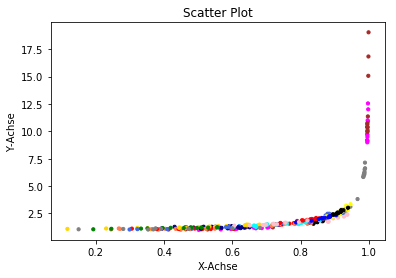

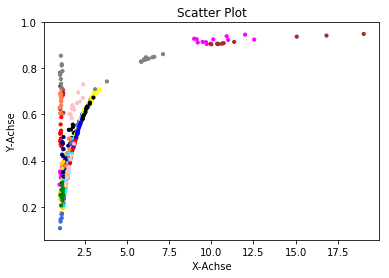

In [5]:
#Scatter-Plot: Attribut 3&4 leafArr
plt.scatter(leafArr[2],leafArr[3], c=leafArr['colors'], s=10)
plt.title('Scatter Plot')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.show()

#Scatter-Plot: Attribut 4&5 leafArr
plt.scatter(leafArr[3],leafArr[4], c=leafArr['colors'], s=10)
plt.title('Scatter Plot')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.show()

In [6]:
#Berechnung der Kovarianz nach Spalte abhängig von 'classname'
leafArr.cov()['classname']

classname       124.378579
id_per_class     -0.584765
2                 0.212374
3                 7.977202
4                 0.308155
5                 0.142993
6                 0.059891
7                -0.120735
8                -0.017219
9                -0.197665
10                0.041094
11                0.044098
12                0.014556
13                0.003455
14                0.000903
15                0.115385
Name: classname, dtype: float64

In [7]:
#Random Zeilen zuordnen und aufteilen in 70-30
n_total = len(leafArr)
selector = np.random.random((n_total,1))
index_test = selector < 0.3

test_set = leafArr[index_test]
training_set = leafArr[~index_test]
print(len(test_set),len(training_set))

117 223


In [8]:
def pd_to_tf(df):
    df = df.as_matrix()
    leafArrCopy = {}
    leafArrCopy['target'] = df[:,0].astype("int32") - 1
    leafArrCopy['data'] = df[:,2:-2].astype("float64")
    return leafArrCopy

test_set = pd_to_tf(test_set)
training_set = pd_to_tf(training_set)
training_set

{'data': array([[  7.26940000e-01,   1.47420000e+00,   3.23960000e-01, ...,
           1.61080000e-02,   5.23230000e-03,   2.74770000e-04],
        [  7.41730000e-01,   1.52570000e+00,   3.61160000e-01, ...,
           8.11950000e-03,   2.70800000e-03,   7.48460000e-05],
        [  7.37970000e-01,   1.45970000e+00,   3.53760000e-01, ...,
           4.27070000e-03,   1.15440000e-03,   6.62720000e-05],
        ..., 
        [  3.75220000e-01,   1.14170000e+00,   8.17250000e-01, ...,
           4.17030000e-02,   1.33440000e-02,   8.20330000e-04],
        [  3.53440000e-01,   1.03290000e+00,   7.81470000e-01, ...,
           4.11010000e-02,   1.61230000e-02,   4.52880000e-04],
        [  5.99880000e-01,   1.14270000e+00,   7.15320000e-01, ...,
           1.81210000e-02,   6.19000000e-03,   2.64540000e-04]]),
 'target': array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
         2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
         6,  6,  6,  6

In [9]:
#Trainingsdaten festlegen
def get_train_inputs():
    x = tf.constant(training_set['data'])
    y = tf.constant(training_set['target'])
    return x, y

In [10]:
#Testdaten festlegen
def get_test_inputs():
    x = tf.constant(test_set['data'])
    y = tf.constant(test_set['target'])
    return x, y

In [11]:
#36 Klassifizierungen in CSV-Datei (siehe Spalte "classname")
n_classes = 36
n_features = training_set['data'].shape[1]

print(n_features)
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=n_features)]

13


In [16]:
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[64, 32, 16],
                                            n_classes=36,)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014DBE212EB8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}


In [14]:

classifier.fit(input_fn=get_train_inputs, steps=5000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\cjord\AppData\Local\Temp\tmpi3v90nlp\model.ckpt-5000
INFO:tensorflow:Saving checkpoints for 5001 into C:\Users\cjord\AppData\Local\Temp\tmpi3v90nlp\model.ckpt.
INFO:tensorflow:loss = 0.455357, step = 5001
INFO:tensorflow:global_step/sec: 286.839
INFO:tensorflow:loss = 0.460723, step = 5101 (0.362 sec)
INFO:tensorflow:global_step/sec: 283.169
INFO:tensorflow:loss = 0.445667, step = 5201 (0.353 sec)
INFO:tensorflow:global_step/sec: 301.666
INFO:tensorflow:loss = 0.434764, step = 5301 (0.331 sec)
INFO:tensorflow:global_step/sec: 288.268
INFO:tensorflow:loss = 0.433867, ste

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x0000014DBBDB2EB8>, 'hidden_units': [64, 32, 16], 'feature_columns': (_RealValuedColumn(column_name='', dimension=13, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x0000014DB8AFB840>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [15]:
accuracy_score = classifier.evaluate(input_fn=get_test_inputs, steps=1)["accuracy"]
print("\nGenauigkeit: {0:.2f}%\n".format(100*accuracy_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-09-07-11:33:42
INFO:tensorflow:Restoring parameters from C:\Users\cjord\AppData\Local\Temp\tmpi3v90nlp\model.ckpt-10000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-09-07-11:33:43
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.598291, global_step = 10000, loss = 2.35088

Genauigkeit: 59.83%

